<a href="https://colab.research.google.com/github/EddyGiusepe/Biblioteca_GRADIO/blob/main/Gradio_na_Web_DEPLOY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Deploy com Gradio</h2>


Data Scientist Jr.: Eddy Giusepe Chirinos Isidro 


Você pode assistir o seguinte vídeo e link para mais detalhes:


* [GitHub da gradio](https://github.com/gradio-app/gradio),
* [Vídeo do deploy com Gradio](https://www.youtube.com/watch?v=AE-3Y1cBve0).

## Instalação do pacote: Gradio


In [1]:
!pip install gradio

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 1.9 MB 43.0 MB/s 
     |████████████████████████████████| 206 kB 43.0 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 3.0 MB 33.7 MB/s 
     |████████████████████████████████| 961 kB 47.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=ca7f318b19a32140c9cdf16f67fdc1f379087531eb30f0db8f76ba217c7f9b19
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=7ba9388ac671dfaea814c1364e33f05a3cdeebf1b0b901078e9f7f1fb8c0bfd2
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


## Funcionalidades para ciência de Dados

A seguir criamos uma camada de interação com o usuário. Aqui utilizamos a interface gráfica do Gradio: a qual depende da definição de uma função, inputs e outputs.    


In [7]:
import gradio as gr 

def greet(name):
  return "Fala cientista de Dados Jr.  " + name + ",  tudo bem com você?"

iface = gr.Interface(fn=greet, inputs="text", outputs="text")
iface.launch()


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://57245.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7865/',
 'https://57245.gradio.app')

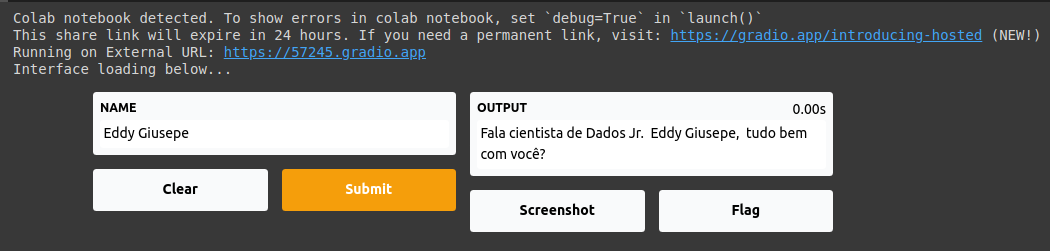

## Exemplo de implementação de tratamento de Imagens

Tratamento de imagens com o filtro Sepia. Este filtro deixa a imagem um pouco "mais velha".

In [8]:
import gradio as gr
import numpy as np

def sepia(img):
  sepia_filter = np.array([[0.393, 0.769, 0.189],
                           [.349, .686, .168],
                           [.272, .534, .131]])
  
  sepia_img = img.dot(sepia_filter.T)
  sepia_img /= sepia_img.max()
  return sepia_img



iface = gr.Interface(sepia, gr.inputs.Image(shape=(200, 200)), "image")
iface.launch()




Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://22840.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7866/',
 'https://22840.gradio.app')

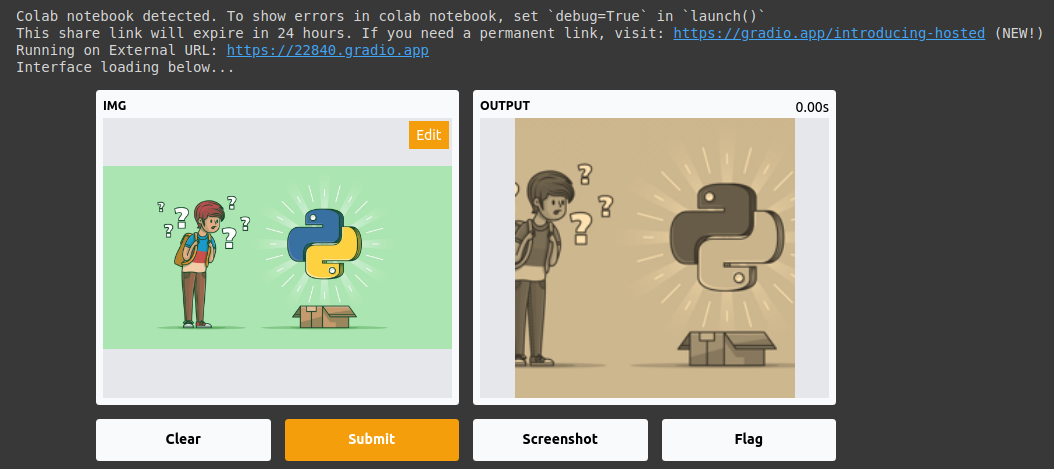

## Exemplo de implementação de reconhecimento de imagens

Para ver o seguinte exemplo com mais detalhe fazer [click aqui](https://gradio.app/ml_examples).

Aqui se usou as imagens do seguinte site: [site git](https://raw.githubusercontent.com/gradio-app/mobilenet-example/master/labels.txt). Aqui utilizamos um ``modelo pre-treinado`` para reconhecimento de imagens (classificação). 

In [10]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

inception_net = tf.keras.applications.InceptionV3() # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299, 299))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://58901.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7868/',
 'https://58901.gradio.app')

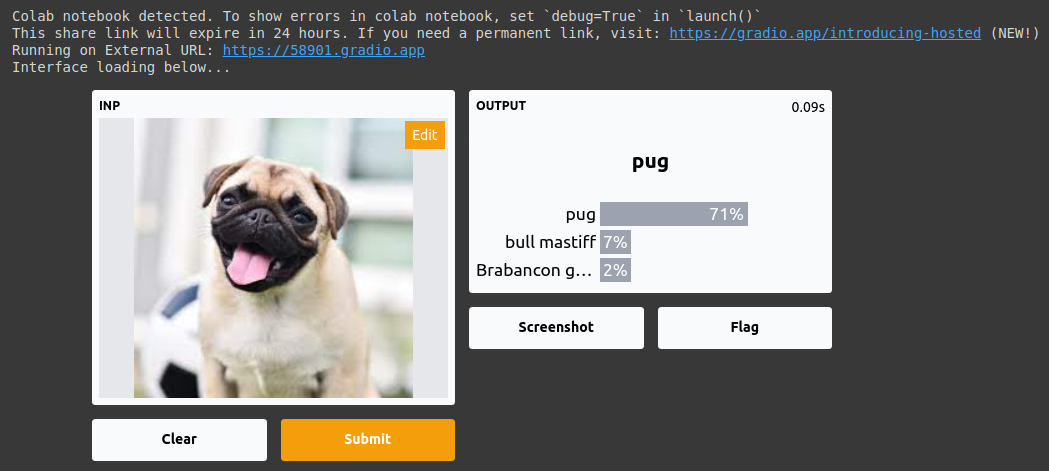

## Sistema de saúde para detecção de Doenças

In [11]:
# Instalamos um pacote necessário para a detecção

!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=07e5549f6fdb91d6e07a6ac1f745b76d1fafab62cc27b3fb2c9eeeec2f4ce33d
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [12]:
# Importamos a nossas bibliotecas

import gradio as gr
import numpy as np
from fpdf import FPDF 
import os 
import tempfile





In [13]:
# Criamos a função que me ajudará a detectar as doenças

def disease_report(img, scan_for, generate_report):



  results = []
  for i, mode in enumerate(["Red", "Green", "Blue"]):
    color_filter = np.array([0, 0, 0])
    color_filter[i] = 1
    results.append([mode, img*color_filter])

  tmp_dir = tempfile.gettempdir()
  report = os.path.join(tmp_dir, "report.pdf")
  if generate_report:
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=15)
    pdf.cell(200, 10, txt="Disease Report", ln=1, align='C')
    pdf.cell(200, 10, txt="A Gradio Demo", ln=2, align='C')
    pdf.output(report)
  return results, report if generate_report else None


iface = gr.Interface(disease_report,
                     ["image",
                      gr.inputs.CheckboxGroup(["Cancer", "Rash", "Heart Failure", "Stroke", "Diabetes", "Pneumonia"]),
                      "checkbox"
                      ],
                     [
                      gr.outputs.Carousel(["text", "image"], label="Disease"),
                      gr.outputs.File(label="Report")
                     ],
                     title="Disease Report",
                     description="Upload an Xray and select the diseases to scan for.",
                     theme = "compact",
                     flagging_options=["good", "bad", "etc"],
                     allow_flagging="auto"
                     )


if __name__ == "__main__":
  iface.launch()






Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://56038.gradio.app
Interface loading below...


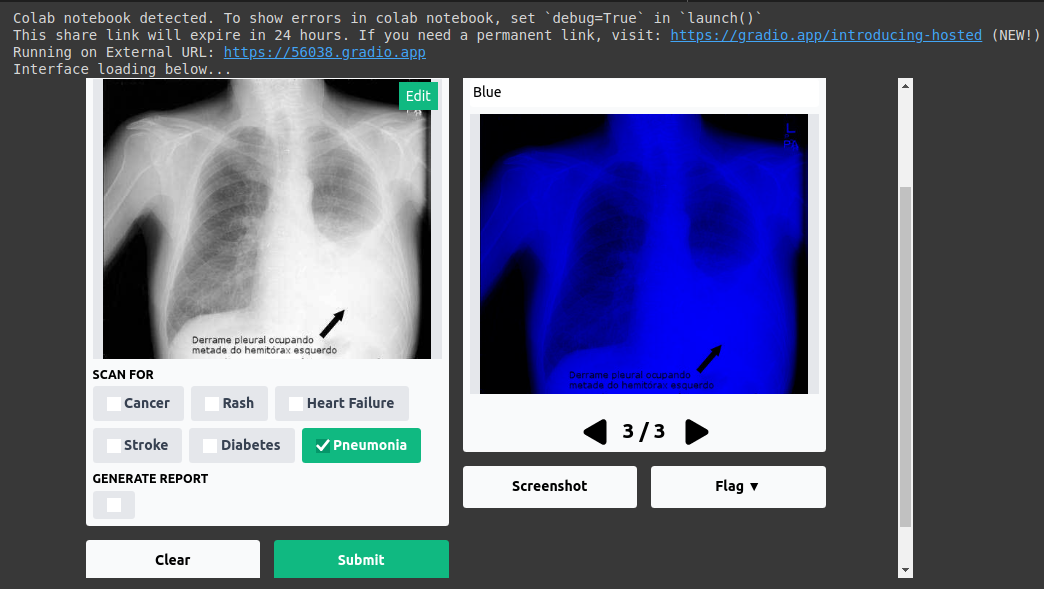